# 1.0 Introduction

# Data Science for Good: Kiva Crowdfunding

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

In Kaggle Datasets' inaugural Data Science for Good challenge, Kiva is inviting the Kaggle community to help them build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans. Unlike traditional machine learning competitions with rigid evaluation criteria, participants will develop their own creative approaches to addressing the objective. Instead of making a prediction file as in a supervised machine learning problem, submissions in this challenge will take the form of Python and/or R data analyses using Kernels, Kaggle's hosted Jupyter Notebooks-based workbench.

Kiva has provided a dataset of loans issued over the last two years, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. Participants will write kernels on this dataset to submit as solutions to this objective and five winners will be selected by Kiva judges at the close of the event. In addition, awards will be made to encourage public code and data sharing. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.

The sections that follow describe in more detail how to participate, win, and use available resources to make a contribution towards helping Kiva better understand and help entrepreneurs around the world.

## 1.1 Importing and installing dependencies:

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('Installed all dependencies!')

Installed all dependencies!


## 1.2 Saving and displaying parts of the dataset:

In [2]:
# Exploring the data:

# Kiva dataset:
kiva_loans = pd.read_csv('../kiva_loans.csv')
kiva_mpi_region_locations = pd.read_csv('../kiva_mpi_region_locations.csv')
loan_theme_ids = pd.read_csv('../loan_theme_ids.csv')
loan_themes_by_region = pd.read_csv('../loan_themes_by_region.csv')

# Multidimensional Poverty Index:
MPI_national = pd.read_csv('../MPI_national.csv')
MPI_subnational = pd.read_csv('../MPI_subnational.csv')

## 1.3 Converting columns to lower case and displaying all of them:

In [118]:
# Converting dataset to lowercase for easier future use:

kiva_loans.columns = [x.lower() for x in kiva_loans.columns]
kiva_mpi_region_locations.columns = [x.lower() for x in kiva_mpi_region_locations.columns]
loan_theme_ids.columns = [x.lower() for x in loan_theme_ids.columns]
loan_themes_by_region.columns = [x.lower() for x in loan_themes_by_region.columns]
MPI_national.columns = [x.lower() for x in MPI_national.columns]
MPI_subnational.columns = [x.lower() for x in MPI_subnational.columns]

print('Kiva Loans Columns: ', pd.DataFrame(kiva_loans.columns))

Kiva Loans Columns:                       0
0                   id
1        funded_amount
2          loan_amount
3             activity
4               sector
5                  use
6         country_code
7              country
8               region
9             currency
10          partner_id
11         posted_time
12      disbursed_time
13         funded_time
14      term_in_months
15        lender_count
16                tags
17    borrower_genders
18  repayment_interval
19                date


In [119]:
print('Kiva MPI Region Locations Columns: ', pd.DataFrame(kiva_mpi_region_locations.columns))

Kiva MPI Region Locations Columns:                0
0  locationname
1           iso
2       country
3        region
4  world_region
5           mpi
6           geo
7           lat
8           lon


In [120]:
print('Loan Theme IDs Columns: ', pd.DataFrame(loan_theme_ids.columns))

Loan Theme IDs Columns:                   0
0               id
1    loan theme id
2  loan theme type
3       partner id


In [121]:
print('Loan Themes by Region Columns: ', pd.DataFrame(loan_themes_by_region.columns))

Loan Themes by Region Columns:                       0
0           partner id
1   field partner name
2               sector
3        loan theme id
4      loan theme type
5              country
6              forkiva
7               region
8          geocode_old
9                  iso
10              number
11              amount
12        locationname
13             geocode
14               names
15                 geo
16                 lat
17                 lon
18          mpi_region
19             mpi_geo


In [122]:
print('MPI National Columns: ', pd.DataFrame(MPI_national.columns))

MPI National Columns:                                  0
0                             iso
1                         country
2                       mpi urban
3           headcount ratio urban
4  intensity of deprivation urban
5                       mpi rural
6           headcount ratio rural
7  intensity of deprivation rural


In [123]:
print('MPI Loans Columns: ', pd.DataFrame(kiva_loans.columns))

MPI Loans Columns:                       0
0                   id
1        funded_amount
2          loan_amount
3             activity
4               sector
5                  use
6         country_code
7              country
8               region
9             currency
10          partner_id
11         posted_time
12      disbursed_time
13         funded_time
14      term_in_months
15        lender_count
16                tags
17    borrower_genders
18  repayment_interval
19                date


## 1.4 Displying the total amount of rows the dataset has in each column:

In [4]:
# Analizing the dataset:

print('kiva_loans Shape: ', kiva_loans.shape)
print(pd.DataFrame(kiva_loans.nunique()))

kiva_loans Shape:  (671205, 20)
                         0
id                  671205
funded_amount          610
loan_amount            479
activity               163
sector                  15
use                 424912
country_code            86
country                 87
region               12695
currency                67
partner_id             366
posted_time         667399
disbursed_time        5719
funded_time         498007
term_in_months         148
lender_count           503
tags                 86719
borrower_genders     11298
repayment_interval       4
date                  1298


## 1.5 Overview of the dataset:

In [5]:
# Overview of the dataset:

kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


# 2.0 Analyzing where Kiva's biggest loans are being invested

## 2.1 Displaying the countries that got the most money:

In [6]:
# Displaying the top 10 countries that got the biggest dollar amount in loans:

countries = pd.DataFrame(kiva_loans['country'].value_counts().head(10))
countries.reset_index(inplace=True)
countries.columns = ['country', 'total_loaned']
countries

,country,total_loaned
0,Philippines,160441
1,Kenya,75825
2,El Salvador,39875
3,Cambodia,34836
4,Pakistan,26857
5,Peru,22233
6,Colombia,21995
7,Uganda,20601
8,Tajikistan,19580
9,Ecuador,13521


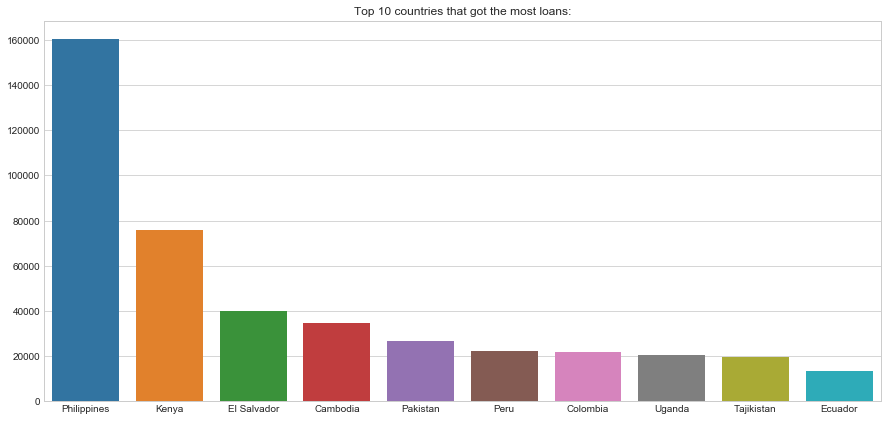

In [39]:
# Displaying the results in a graph:

plt.figure(figsize=(15, 7))

sns.set_style("whitegrid")
sns.barplot(x=countries['country'], y=countries['total_loaned'])
plt.title('Top 10 countries that got the most loans:')
plt.xlabel('')
plt.ylabel('')
plt.show()

According to the dataset, Kiva is investing more than twice the amount of money into the Philippines than the 2nd country (Kenya).

## 2.2 Displaying the sectors that got the most money invested:

In [8]:
# Displaying the top sectors where money was invested:

sectors = pd.DataFrame(kiva_loans['sector'].value_counts())
sectors.reset_index(inplace=True)
sectors.columns = ['sector', 'total_loaned']
sectors

,sector,total_loaned
0,Agriculture,180302
1,Food,136657
2,Retail,124494
3,Services,45140
4,Personal Use,36385
5,Housing,33731
6,Clothing,32742
7,Education,31013
8,Transportation,15518
9,Arts,12060


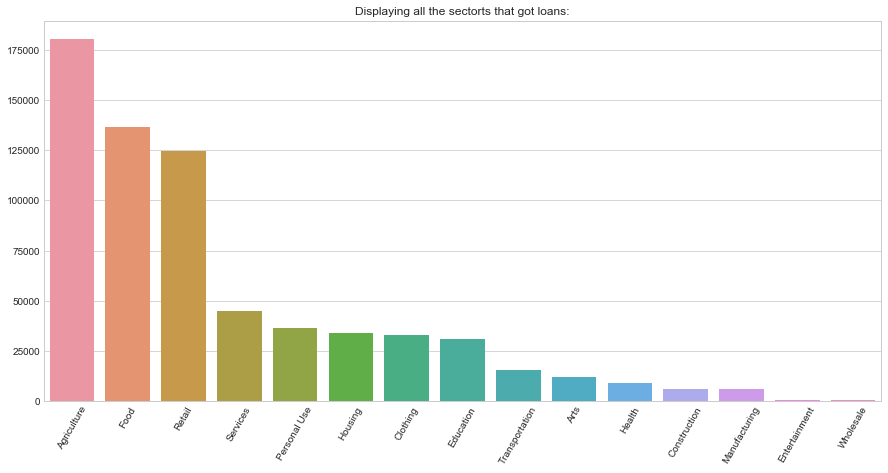

In [40]:
# Displaying the results in a graph:

plt.figure(figsize=(15, 7))

sns.set_style("whitegrid")
sns.barplot(x=sectors['sector'], y=sectors['total_loaned'])
plt.title('Displaying all the sectorts that got loans:')
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('')
plt.show()

Agriculture seems to be the most popular investment for Kiva, followed by food and retail slighlty lagging behind.

# 3.0 Analyzing the Philippines

## 3.1 Introduction of the Philippines:
The Philippine Islands became a Spanish colony during the 16th century; they were ceded to the US in 1898 following the Spanish-American War. In 1935 the Philippines became a self-governing commonwealth. Manuel QUEZON was elected president and was tasked with preparing the country for independence after a 10-year transition. In 1942 the islands fell under Japanese occupation during World War II, and US forces and Filipinos fought together during 1944-45 to regain control. On 4 July 1946 the Republic of the Philippines attained its independence. A 20-year rule by Ferdinand MARCOS ended in 1986, when a "people power" movement in Manila ("EDSA 1") forced him into exile and installed Corazon AQUINO as president. Her presidency was hampered by several coup attempts that prevented a return to full political stability and economic development. Fidel RAMOS was elected president in 1992. His administration was marked by increased stability and by progress on economic reforms. In 1992, the US closed its last military bases on the islands. Joseph ESTRADA was elected president in 1998. He was succeeded by his vice-president, Gloria MACAPAGAL-ARROYO, in January 2001 after ESTRADA's stormy impeachment trial on corruption charges broke down and another "people power" movement ("EDSA 2") demanded his resignation. MACAPAGAL-ARROYO was elected to a six-year term as president in May 2004. Her presidency was marred by several corruption allegations but the Philippine economy was one of the few to avoid contraction following the 2008 global financial crisis, expanding each year of her administration. Benigno AQUINO III was elected to a six-year term as president in May 2010 and was succeeded by Rodrigo DUTERTE in May 2016.<br>
The Philippine Government faces threats from several groups, some of which are on the US Government's Foreign Terrorist Organization list. Manila has waged a decades-long struggle against ethnic Moro insurgencies in the southern Philippines, which has led to a peace accord with the Moro National Liberation Front and ongoing peace talks with the Moro Islamic Liberation Front. The decades-long Maoist-inspired New People's Army insurgency also operates through much of the country. In 2016, Philippine armed forces battled an ISIS-Philippines siege in Marawi City, driving DUTERTE to declare martial law in the region. The Philippines faces increased tension with China over disputed territorial and maritime claims in the South China Sea.<br>
<em>source: https://www.cia.gov/library/publications/the-world-factbook/geos/rp.html</em>

## 3.2 Analyzing only the Philippines from the dataset:

In [30]:
# Saving the Philippines in a variable:

philippines = pd.DataFrame(kiva_loans[kiva_loans['country'] == 'Philippines'])
philippines.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
51,653092,175,175,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8,6,NaN,female,irregular,1/2/14
52,653149,175,175,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8,7,NaN,female,irregular,1/2/14
55,653123,700,700,General Store,Retail,"to buy additional items like eggs, charcoal, r...",PH,Philippines,"Brookes Point, Palawan",PHP,145.0,2014-01-02 02:18:02+00:00,2013-12-10 08:00:00+00:00,2014-01-02 03:26:10+00:00,5,2,NaN,female,irregular,1/2/14
56,653338,575,575,Farming,Agriculture,to purchase fertilizers and other farm supplies,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 13:38:42+00:00,2013-12-05 08:00:00+00:00,2014-01-02 23:01:23+00:00,8,19,NaN,female,irregular,1/2/14
65,653242,325,325,General Store,Retail,"to purchase sugar, coffee, coffee creamer, can...",PH,Philippines,"Sinippil, Cauayan City, Isabela",PHP,123.0,2014-01-02 09:13:05+00:00,2013-12-13 08:00:00+00:00,2014-01-02 17:50:06+00:00,7,11,volunteer_pick,female,irregular,1/2/14


### 3.2.1 Displaying where the loans are going based in the sector:

In [31]:
philippines_sectors = pd.DataFrame(philippines['sector'].value_counts())
philippines_sectors.reset_index(inplace=True)
philippines_sectors.columns = ['sector', 'total_loaned']
philippines_sectors

,sector,total_loaned
0,Retail,53581
1,Food,42700
2,Agriculture,36776
3,Housing,6785
4,Transportation,4568
5,Services,4479
6,Clothing,2761
7,Arts,1990
8,Personal Use,1943
9,Education,1772


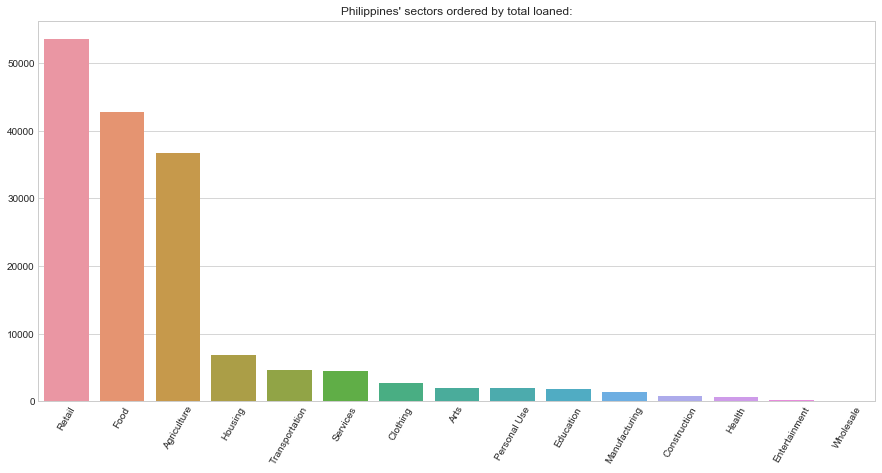

In [38]:
plt.figure(figsize=(15, 7))

sns.set_style('whitegrid')
sns.barplot(x=philippines_sectors['sector'], y=philippines_sectors['total_loaned'])
plt.title("Philippines' sectors ordered by total loaned:")
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('')
plt.show()

Surprinsigly, in the case of the Philippines; Kiva decided to invest more in retail, food and then agriculture respectively.

### 3.2.2 Analyzing each sector in more detail:

In [107]:
# Saving the different activities in a variable:

philippines_activities = pd.DataFrame(philippines['activity'].value_counts())
philippines_activities.reset_index(inplace=True)
philippines_activities.columns = ['activity', 'total_loaned']
philippines_activities.head(10)

,activity,total_loaned
0,General Store,42960
1,Pigs,19985
2,Farming,11924
3,Fish Selling,9060
4,Fishing,8682
5,Food Production/Sales,8675
6,Personal Housing Expenses,6591
7,Fruits & Vegetables,4486
8,Retail,3873
9,Motorcycle Transport,3002


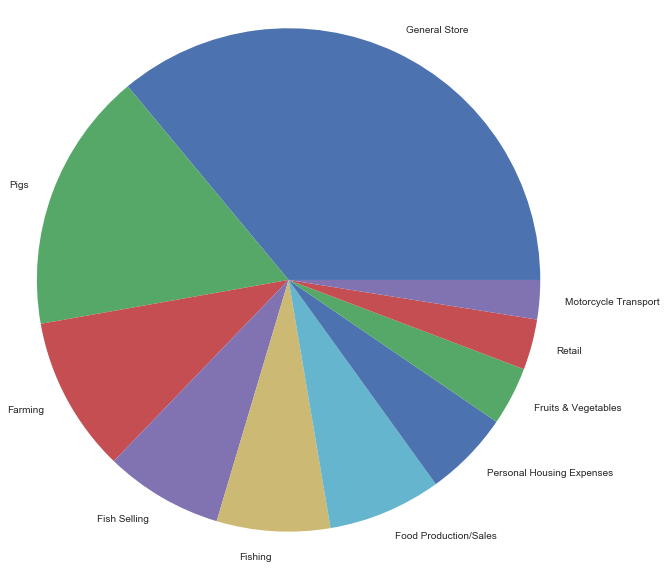

In [136]:
# Displaying the results in a pie chart:

plt.figure(figsize=(10, 10))

plt.pie(philippines_activities['total_loaned'][:10], labels=philippines_activities['activity'][:10])
plt.axis('equal')
plt.show()

As highlighted before, most investments in the Philippines go to general stores that falls in the category of retail, and is followed by pigs which is from the food category.

### 3.3.1 Analyzing the general store activity:

In [117]:
# Saving only the loans that were used in General Stores:

philippines_general_store = philippines[philippines['activity'] == 'General Store']
philippines_general_store.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
55,653123,700,700,General Store,Retail,"to buy additional items like eggs, charcoal, r...",PH,Philippines,"Brookes Point, Palawan",PHP,145.0,2014-01-02 02:18:02+00:00,2013-12-10 08:00:00+00:00,2014-01-02 03:26:10+00:00,5,2,NaN,female,irregular,1/2/14
65,653242,325,325,General Store,Retail,"to purchase sugar, coffee, coffee creamer, can...",PH,Philippines,"Sinippil, Cauayan City, Isabela",PHP,123.0,2014-01-02 09:13:05+00:00,2013-12-13 08:00:00+00:00,2014-01-02 17:50:06+00:00,7,11,volunteer_pick,female,irregular,1/2/14
71,653108,125,125,General Store,Retail,to buy goods to sell.,PH,Philippines,Pagadian - Lower Bagong Silang Pagadian City,PHP,126.0,2014-01-02 01:01:40+00:00,2013-12-16 08:00:00+00:00,2014-01-02 03:07:34+00:00,8,5,"#Woman Owned Biz, #Parent, #Interesting Photo",female,irregular,1/2/14
91,653335,350,350,General Store,Retail,to buy additional groceries to sell,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 13:33:43+00:00,2013-12-10 08:00:00+00:00,2014-01-02 23:38:46+00:00,14,11,NaN,female,irregular,1/2/14
96,653107,325,325,General Store,Retail,to buy additional stocks for her sari-sari store.,PH,Philippines,Plaridel-Cebulin,PHP,126.0,2014-01-02 01:01:10+00:00,2013-12-03 08:00:00+00:00,2014-01-02 14:24:58+00:00,11,10,"#Elderly, #Schooling, #Woman Owned Biz",female,irregular,1/2/14


In [174]:
# Analyzing the most common usage of money in general stores:

philippines_use = pd.DataFrame(philippines_general_store['use'].value_counts())
philippines_use.reset_index(inplace=True)
philippines_use.columns = ['use', 'total']
philippines_use.head(15)

,use,total
0,to purchase more groceries to sell.,1380
1,to buy additional stocks of groceries to sell.,875
2,to buy more groceries to sell.,825
3,to buy additional items to sell in her general...,428
4,to buy more stocks of groceries to sell.,398
5,"to buy items to sell like beverages, canned go...",375
6,"to buy items to sell like canned goods, person...",374
7,to purchase more groceries to sell in her gene...,364
8,"to buy items to sell like canned goods, person...",350
9,"to buy items to sell like beverages, canned go...",343


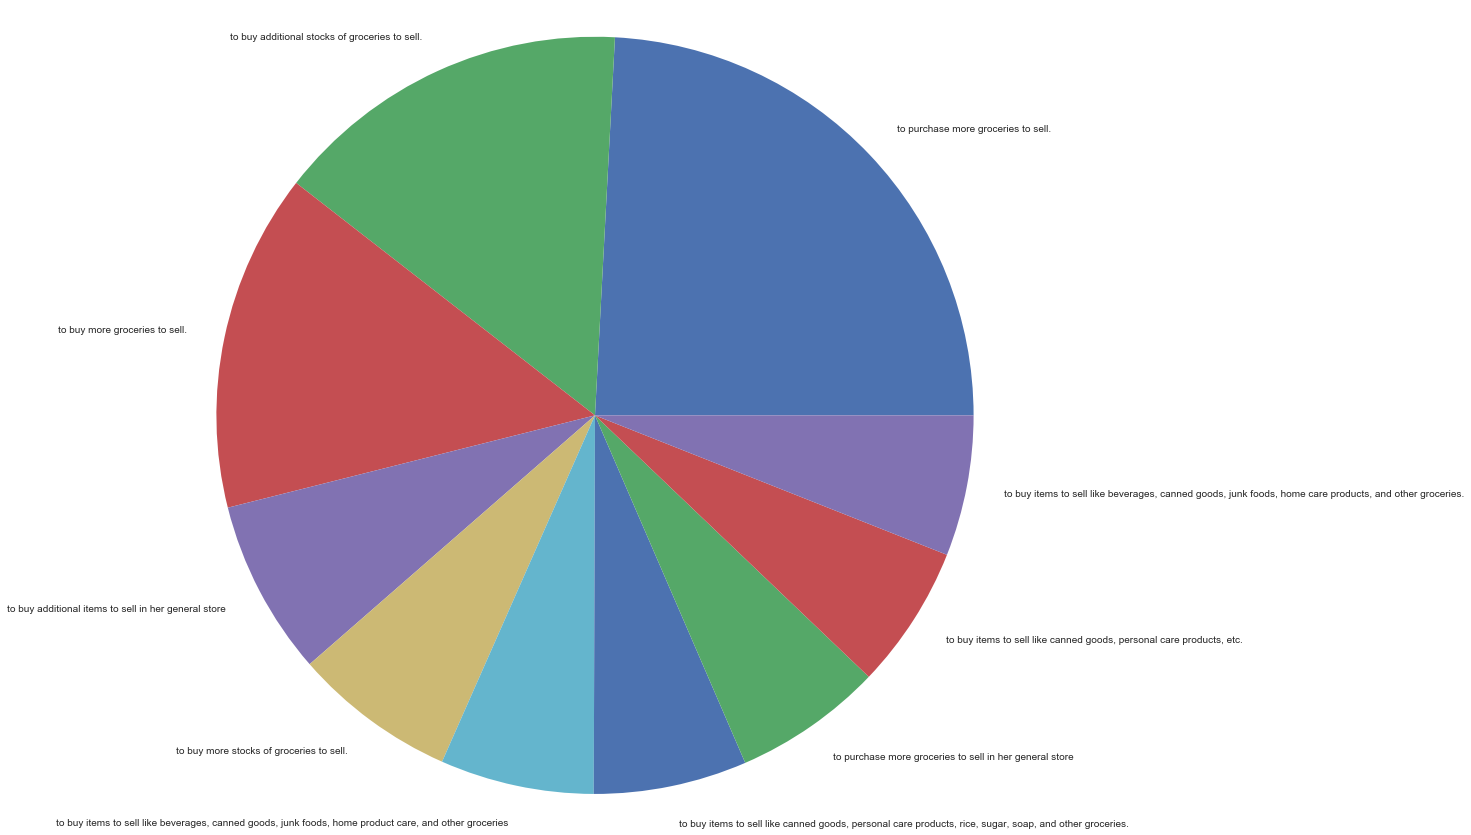

In [169]:
# Displaying the results in a pie chart:

plt.figure(figsize=(15, 15))

plt.pie(philippines_use['total'][:10], labels=philippines_use['use'][:10])
plt.axis('equal')
plt.show()

Most of the borrowers have a tendency of buying groceries but they are resold to other people. In fact, the top 10 uses for loans are for buying groceries and resell them.
There can be many reasons for this:
* Some people can own smaller stores and sell merchandise to their clients.
* Others can sell them without having any stores and try to make a profit.
It also makes me believe that this borrowing pattern could be inflating the Philippines' loan distribution since it is the most popular reason to ask for a loan. It explains why food and agriculture are 2nd and 3rd respectively.

My questions then will be, if there is a way to find if the borrowers are selling these products at a higher price? Since the resell of products could lead to inflation of prices on basic foods, this can prevent for the unfortunate person to not be able to afford these inflated prices.

### 3.3.2 Analyzing whether this borrowing pattern has increased overtime based on the timeline provided in the dataset:

In [ ]:
# Getting the timeset from the dataset

philippines_time = 